In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
pd.pandas.set_option('display.max_columns',None)

# 1. Data Pre-processing

## 1.1 Download the dataset for the period 2009 – 2018 and create a dataframe that concatenates Wales (total) employment value only.

In [46]:
import os
df=pd.DataFrame()
f1=pd.read_csv('yr_2009.csv')
directory = r'C:\Users\nsr156\Documents\PROJECTS\GIT_HUB\Welsh Employment Stats'
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        if filename=='yr_2009.csv':
            df=pd.read_csv(filename)
            continue
        else:
            f2=pd.read_csv(filename)
            df=pd.concat([df,f2.iloc[:,1]],axis=1)
    else:
        continue

In [47]:
df.head()

,Industries,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
0,"Agriculture, forestry and fishing",37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
1,Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
2,Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
3,"Wholesale, retail, transport, hotels and food",345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
4,Information and communication,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500


## 1.3.	Change the name of the industries as below

In [63]:
df.rename(columns={'Industries':'Industry'},inplace=True)
df.index=['Agriculture','Production','Construction','Wholesale',
          'ICT','Finance','Real_Estate','Professional_Service','Public_Administration','Other_Service']
df.drop('Industry',axis=1,inplace=True)

In [65]:
df

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
Wholesale,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
Public_Administration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900
Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


## 1.2.	Check for any null value or outlier. If found replace that with mean value.  

In [84]:
pd.DataFrame({'MissingValues':df.isnull().sum().values},index=df.columns)

,MissingValues
yr_2009,0
yr_2010,0
yr_2011,0
yr_2012,0
yr_2013,0
yr_2014,0
yr_2015,0
yr_2016,0
yr_2017,0
yr_2018,0


plt.figure(figsize=(12,6))
sb.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.xticks(fontsize=14,fontweight='bold',rotation=75)
plt.title('Missing Values Visualisation-Heat Map',fontsize=16,fontweight='bold')
plt.show()

#### Above heat map shows that there are no missing values in any of the years

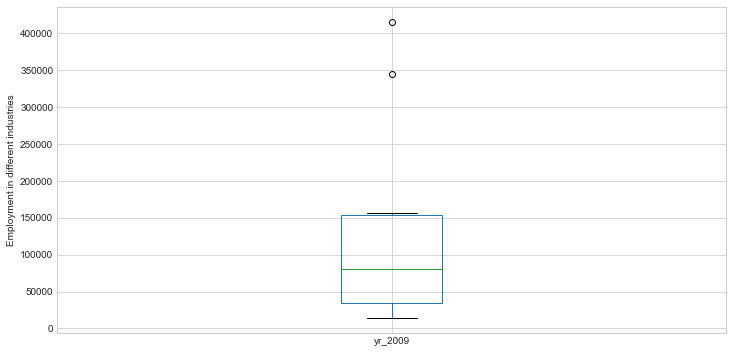

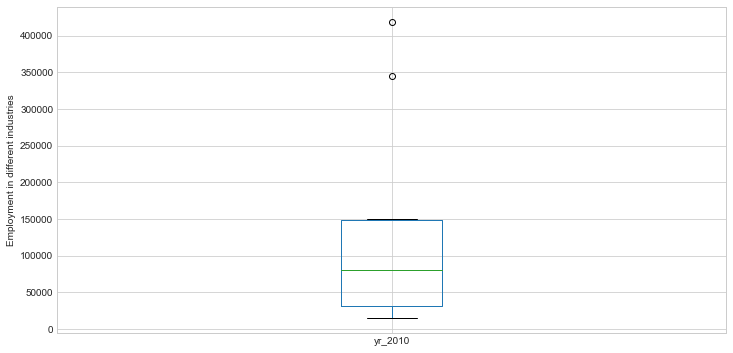

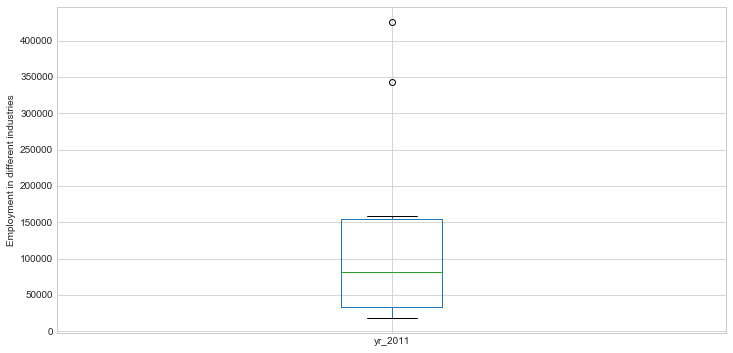

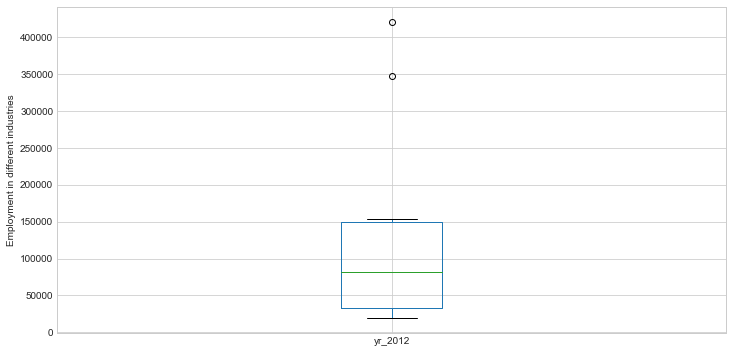

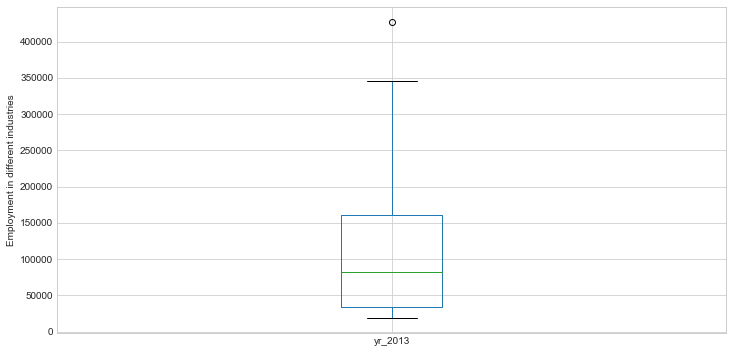

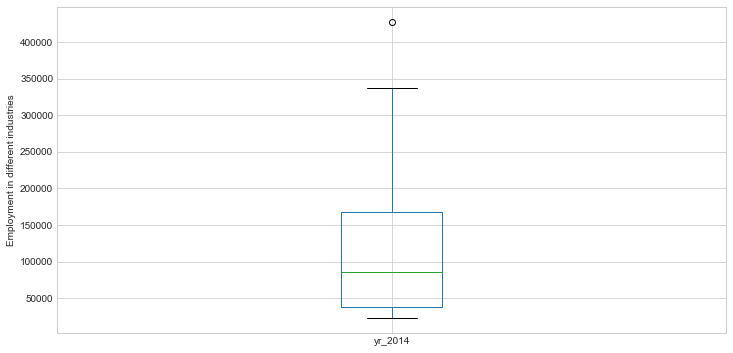

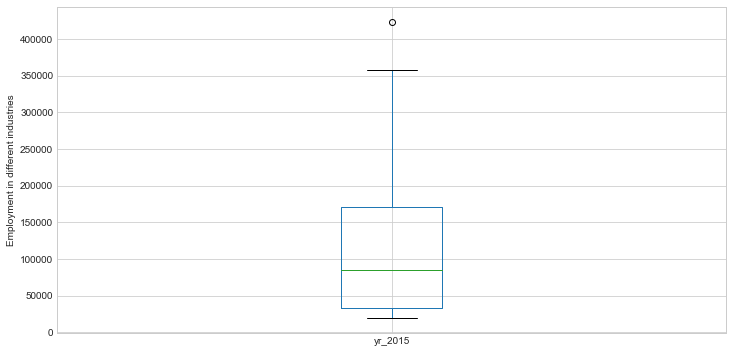

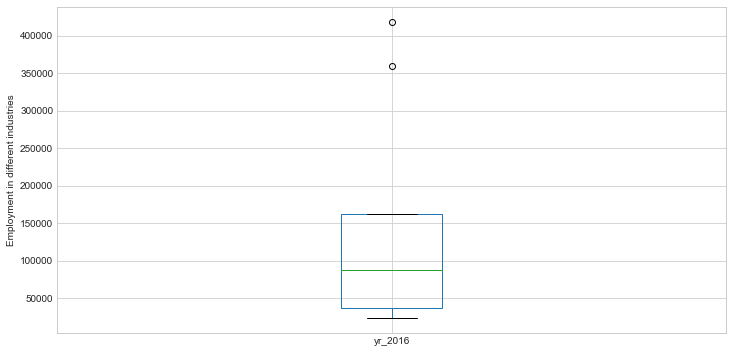

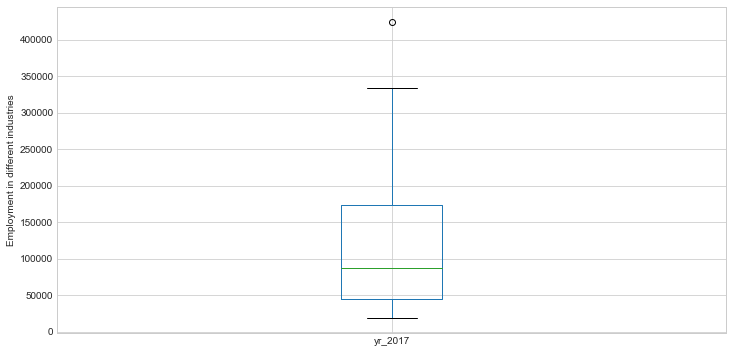

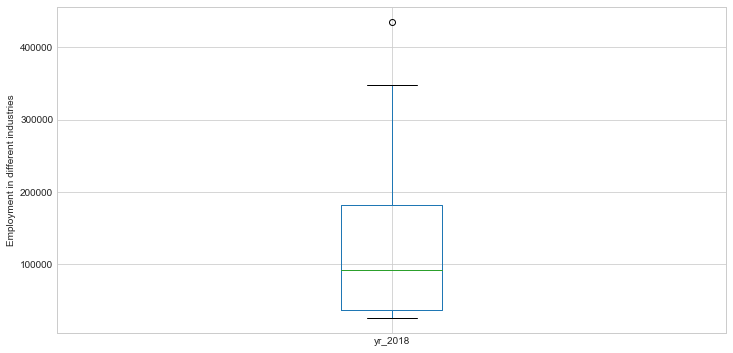

In [83]:
for fea in df.columns:
    plt.figure(figsize=(12,6))
    df[fea].plot(kind='box')
    plt.ylabel('Employment in different industries')
    plt.xlabel('')
    plt.show()

In [161]:
dfCopy=df.copy()
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
df[(df> (q3 + 1.5 * IQR)).any(axis=1)]

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Wholesale,345400,344500,343100,347300,345100,337300,357700,360200,333500,347600
Public_Administration,415600,418600,425600,421000,427000,427600,423200,418500,424500,434900


#### above observastions are outliers, replacing outliers by 'mean' of that particular feature
#### outliers are present in 'Wholesale' and 'Public_admisnistartion'

In [158]:
for fea in dfCopy.columns:
    q1=dfCopy[fea].quantile(0.25)
    q3=dfCopy[fea].quantile(0.75)
    IQR=q3-q1
    dfCopy[fea][df[fea]> (q3+ 1.5 * IQR)]=dfCopy[fea].mean()

In [159]:
dfCopy

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
Production,156700,149800,158600,154400,164200,173300,172300,162500,165100,165700
Construction,96600,93200,90000,91300,89300,97000,92600,102700,90800,101800
Wholesale,57710,133040,134660,133730,345100,337300,357700,140880,333500,347600
ICT,27800,27900,26400,27200,26900,35700,24000,34400,58900,31500
Finance,33800,29800,33200,31100,32400,32400,30800,31000,32100,35500
Real_Estate,13500,14600,17600,18800,18000,22200,19100,22700,18200,25200
Professional_Service,144800,145800,143600,137300,149900,152900,166200,161200,176400,187100
Public_Administration,57710,133040,134660,133730,136510,139440,140380,140880,142290,145220
Other_Service,64200,68000,72400,72800,75500,73300,77200,72400,83200,81800


In [163]:
dfCopy.loc[['Wholesale','Public_Administration'],:]

,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018
Wholesale,57710,133040,134660,133730,345100,337300,357700,140880,333500,347600
Public_Administration,57710,133040,134660,133730,136510,139440,140380,140880,142290,145220


# 2. Data analysis

## 2.1.	Which industry employed highest and lowest workers over the period?

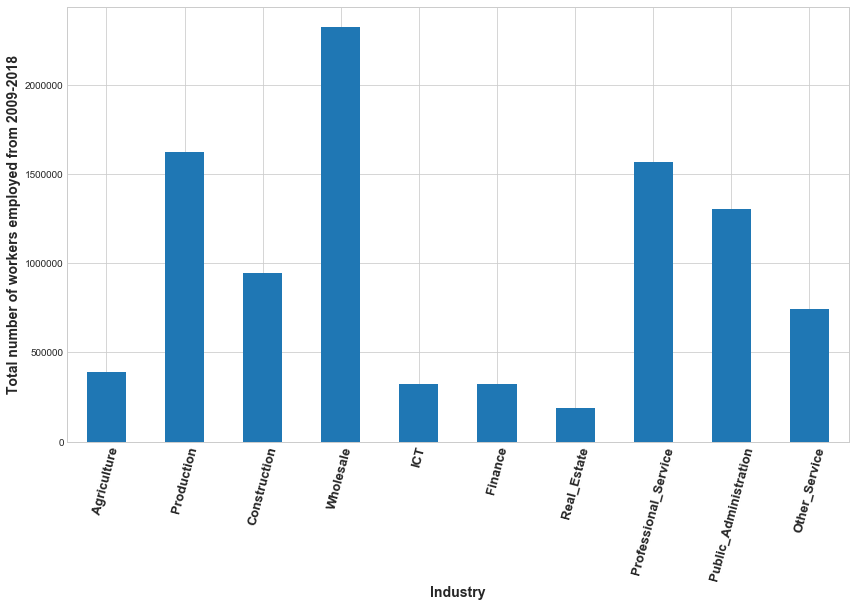

In [174]:
plt.figure(figsize=(14,8))
dfCopy.sum(axis=1).plot(kind='bar')
plt.ylabel('Total number of workers employed from 2009-2018',fontweight='bold',fontsize=14)
plt.xlabel('Industry',fontsize=14,fontweight='bold')
plt.xticks(fontsize=13,fontweight='bold',rotation=75)
plt.show()

#### Over the period of 2009-2018, the highest number of workers are employed by WHOLESALE industry
#### Over the period of 2009-2018, the lowest number of workers are employed by REAL ESTATE industry

## 2.2.	Which industry has the highest and lowest overall growth over the period? 

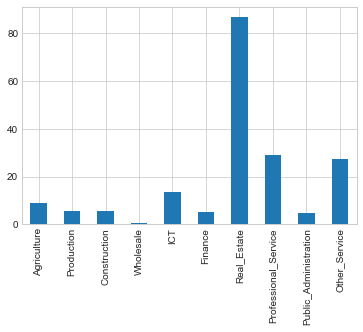

In [181]:
np.round((df['yr_2018']-df['yr_2009'])/df['yr_2009']*100,2).plot(kind='bar')

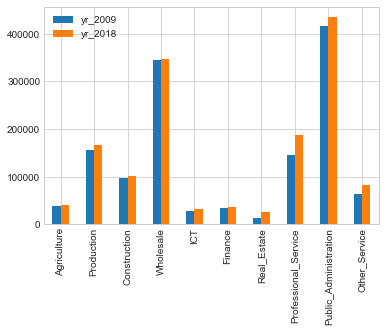

In [182]:
df[['yr_2009','yr_2018']].plot(kind='bar')